<a id='top'></a>

# Face Detection

<p/>"Face detection is a computer technology that determines the locations and sizes of human faces in arbitrary (digital) images. It detects facial features and ignores anything else, such as buildings, trees and bodies. Face detection can be regarded as a more general case of face localization.</p>

<p>OpenCV's algorithm is currently using the following Haar-like features which are the input to the basic classifiers: <p>

![alt text](Image\Haar.jpg "Image Features")

In [1]:
# Face Recognition

import cv2

In [2]:
# We load the cascade for the face.
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 

# We load the cascade for the eyes.
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml') 

#### there are various  Haar-like feature

![alt text](Image\feature.jpg "Haar-like feature")

#### but we gonna use only frontalface and eye features

<hr>

In [3]:
# We create a function that takes as input the image in black and white (gray)
# and the original image (frame),
# and that will return the same image with the detector rectangles. 

def detect(gray, frame): 
    
    # We apply the detectMultiScale method from the face cascade to locate one or several faces
    #in the image.
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
    
     # For each detected face:
    for (x, y, w, h) in faces:
        
        # We paint a rectangle around the face.
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2) 
        
        # We get the region of interest in the black and white image.
        roi_gray = gray[y:y+h, x:x+w] 
        
        # We get the region of interest in the colored image.
        roi_color = frame[y:y+h, x:x+w] 
        
         # We apply the detectMultiScale method to locate one or several eyes in the image.
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)
        
        # For each detected eye:
        for (ex, ey, ew, eh) in eyes: 
            
            # We paint a rectangle around the eyes, but inside the referential of the face.
            cv2.rectangle(roi_color,(ex, ey),(ex+ew, ey+eh), (0, 255, 0), 2) 
            
    # We return the image with the detector rectangles.        
    return frame 



<hr>

 ## Face Detection in an image :

In [4]:
# importing libraries
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

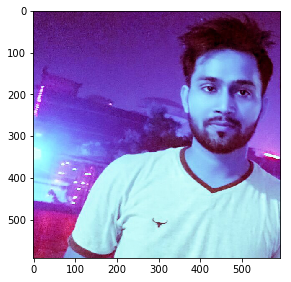

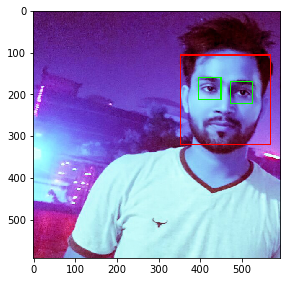

In [5]:
#reading our image
img = cv2.imread('Image\\as.jpg')
imgcopy = cv2.imread('Image\\as.jpg')

#turning into gray scale
gray1= cv2.imread('Image\\as.jpg',0)

 # We get the output of our detect function.
canvas = detect(gray1, img)

    
# We display the outputs.
plt.figure(figsize=(30, 10))
plt.subplot(211)
plt.imshow(imgcopy)

plt.figure(figsize=(30, 10))
plt.subplot(212)
plt.imshow(canvas)
plt.show()


successfully detected face and eyes

<hr>

## Face detection in a Video :

In [6]:
# We turn the webcam on.
video_capture = cv2.VideoCapture(0) 

# We repeat infinitely (until break):
while True: 
    
    # We get the last frame.
    _, frame = video_capture.read() 
    
    # We do some colour transformations.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    
     # We get the output of our detect function.
    canvas = detect(gray, frame)
    
     # We display the outputs.
    cv2.imshow('Video', canvas)
    
    # If we type on the keyboard:
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        # We stop the loop.
        break 

        
# We turn the webcam off.
video_capture.release() 

 # We destroy all the windows inside which the images were displayed.
cv2.destroyAllWindows()

<hr>

<b><a href='#top'>Return to top</a></b>

<b>Created by:</b><br><i><b>Anubhav Shukla</b></i>

<hr>